In [1]:
# Basic data manipulation and numerical operations
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning preprocessing and utilities
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Model imports
from xgboost import XGBRegressor
from sklearn.cluster import KMeans

# Model persistence (saving and loading)
from joblib import dump, load

# Statistical testing
from scipy.stats import ttest_rel  # Import paired t-test function

# Time-related functionality (if you need to time some operations)
import time

In [3]:
# Step 2: Load Data
train_data = pd.read_csv('training.csv')
test_data = pd.read_csv('testing.csv')
train_data.head()

,user_id,age,gender,user_type,purchase_history,avg_session_duration,last_login_days,total_spend,product_reviews,adverts_targeted,discount_offered,sales
0,179,64,Female,VIP,20,14.930296,12,345.851376,18,4,30,68.4
1,388,18,Female,Regular,14,59.226214,215,217.583045,18,4,30,68.4
2,862,56,Female,Regular,45,43.268684,203,503.395449,6,44,30,76.4
3,746,51,Female,VIP,31,19.398599,351,823.916242,5,48,30,79.6
4,298,54,Male,New,30,23.411151,306,395.079011,16,7,30,80.1


In [4]:
test_data.head()

,user_id,age,gender,user_type,purchase_history,avg_session_duration,last_login_days,total_spend,product_reviews,adverts_targeted,discount_offered,sales
0,522,63,Male,New,40,33.581021,114,229.783051,20,31,26,95.3
1,738,38,Female,VIP,10,30.421041,254,661.147422,7,20,23,99.1
2,741,34,Female,Regular,5,19.446717,230,810.832987,2,36,13,85.5
3,661,56,Male,New,9,15.537082,155,131.754215,14,22,25,99.1
4,412,59,Female,New,4,58.969332,181,989.547847,9,20,21,99.9


In [5]:
# Handle categorical variables like gender and user_type using label encoding.
label_encoder = LabelEncoder()
for column in ['gender', 'user_type']:
    train_data[column] = label_encoder.fit_transform(train_data[column])
    test_data[column] = label_encoder.transform(test_data[column])

In [6]:
# List of numerical columns for scaling
numerical_columns = ['age', 'purchase_history', 'avg_session_duration', 'last_login_days',
                     'total_spend', 'product_reviews', 'adverts_targeted', 'discount_offered',
                     ]

# Apply Standard Scaling to numerical columns
scaler = StandardScaler()
train_data[numerical_columns] = scaler.fit_transform(train_data[numerical_columns])
test_data[numerical_columns] = scaler.transform(test_data[numerical_columns])

In [7]:
# Separate the features and target variables for both training and testing data.
X_train = train_data.drop(['sales', 'user_id'], axis=1) # Dropping user_id
y_train = train_data['sales']
X_test = test_data.drop(['sales', 'user_id'], axis=1) # Dropping user_id
y_test = test_data['sales']

In [8]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(800, 10)
(800,)
(200, 10)
(200,)


In [9]:
#Let's define some models for testing
#'reg:squarederror : performing a regression task
models = {
    "XGBoost_LearningRate_0_1_MaxDepth_1": XGBRegressor(objective='reg:squarederror', learning_rate=0.1, max_depth=1),
    "XGBoost_LearningRate_0_5_MaxDepth_1": XGBRegressor(objective='reg:squarederror', learning_rate=0.5, max_depth=1),
    "XGBoost_LearningRate_1_MaxDepth_1": XGBRegressor(objective='reg:squarederror', learning_rate=1, max_depth=1),
    "XGBoost_LearningRate_0_1_MaxDepth_2": XGBRegressor(objective='reg:squarederror', learning_rate=0.1, max_depth=2),
    "XGBoost_LearningRate_0_5_MaxDepth_2": XGBRegressor(objective='reg:squarederror', learning_rate=0.5, max_depth=2),
    "XGBoost_LearningRate_1_MaxDepth_2": XGBRegressor(objective='reg:squarederror', learning_rate=1, max_depth=2),
    "XGBoost_LearningRate_0_1_MaxDepth_3": XGBRegressor(objective='reg:squarederror', learning_rate=0.1, max_depth=3),
    "XGBoost_LearningRate_0_5_MaxDepth_3": XGBRegressor(objective='reg:squarederror', learning_rate=0.5, max_depth=3),
    "XGBoost_LearningRate_1_MaxDepth_3": XGBRegressor(objective='reg:squarederror', learning_rate=1, max_depth=3),
    "XGBoost_LearningRate_0_1_MaxDepth_4": XGBRegressor(objective='reg:squarederror', learning_rate=0.1, max_depth=4),
    "XGBoost_LearningRate_0_5_MaxDepth_4": XGBRegressor(objective='reg:squarederror', learning_rate=0.5, max_depth=4),
    "XGBoost_LearningRate_1_MaxDepth_4": XGBRegressor(objective='reg:squarederror', learning_rate=1, max_depth=4)
}

In [10]:
# Training loop
for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"{name} - Model Trained Successfully!")
    filename = f'{name}_model.joblib'
    dump(model, filename)

# Compute R-squared for the control model
model_results = {}

XGBoost_LearningRate_0_1_MaxDepth_1 - Model Trained Successfully!
XGBoost_LearningRate_0_5_MaxDepth_1 - Model Trained Successfully!
XGBoost_LearningRate_1_MaxDepth_1 - Model Trained Successfully!
XGBoost_LearningRate_0_1_MaxDepth_2 - Model Trained Successfully!
XGBoost_LearningRate_0_5_MaxDepth_2 - Model Trained Successfully!
XGBoost_LearningRate_1_MaxDepth_2 - Model Trained Successfully!
XGBoost_LearningRate_0_1_MaxDepth_3 - Model Trained Successfully!
XGBoost_LearningRate_0_5_MaxDepth_3 - Model Trained Successfully!
XGBoost_LearningRate_1_MaxDepth_3 - Model Trained Successfully!
XGBoost_LearningRate_0_1_MaxDepth_4 - Model Trained Successfully!
XGBoost_LearningRate_0_5_MaxDepth_4 - Model Trained Successfully!
XGBoost_LearningRate_1_MaxDepth_4 - Model Trained Successfully!


In [11]:
# Evaluate and save performance metrics for models
for name in models.keys():
    filename = f'{name}_model.joblib'
    model = load(filename)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    model_results[name] = {'MSE': mse, 'R²': r2}
    print(f"{name} - Mean Squared Error: {mse}, R-squared: {r2}")

XGBoost_LearningRate_0_1_MaxDepth_1 - Mean Squared Error: 208.7813042334634, R-squared: 0.5866937660605478
XGBoost_LearningRate_0_5_MaxDepth_1 - Mean Squared Error: 214.1869995484488, R-squared: 0.5759925800484018
XGBoost_LearningRate_1_MaxDepth_1 - Mean Squared Error: 217.18886761776335, R-squared: 0.5700500422763217
XGBoost_LearningRate_0_1_MaxDepth_2 - Mean Squared Error: 211.2115399693215, R-squared: 0.5818828392236822
XGBoost_LearningRate_0_5_MaxDepth_2 - Mean Squared Error: 209.58042810077603, R-squared: 0.585111809873126
XGBoost_LearningRate_1_MaxDepth_2 - Mean Squared Error: 280.4696586339538, R-squared: 0.44477855059924665
XGBoost_LearningRate_0_1_MaxDepth_3 - Mean Squared Error: 221.09333803665373, R-squared: 0.5623207009433686
XGBoost_LearningRate_0_5_MaxDepth_3 - Mean Squared Error: 230.97870374109695, R-squared: 0.5427515001213976
XGBoost_LearningRate_1_MaxDepth_3 - Mean Squared Error: 285.3210446085861, R-squared: 0.4351746826958266
XGBoost_LearningRate_0_1_MaxDepth_4 - M

In [12]:
# Identifying the model with the lowest MSE and highest R²
best_model_name = min(model_results, key=lambda k: (model_results[k]['MSE'], -model_results[k]['R²']))
best_model_performance = model_results[best_model_name]

print(f"\nBest Model: {best_model_name}")
print(f"- Mean Squared Error: {best_model_performance['MSE']}")
print(f"- R-squared: {best_model_performance['R²']}")


Best Model: XGBoost_LearningRate_0_1_MaxDepth_1
- Mean Squared Error: 208.7813042334634
- R-squared: 0.5866937660605478


In [13]:
# Load control model and make predictions Performance testing
control_model = load(f'{best_model_name}_model.joblib')
control_predictions = control_model.predict(X_test)
y_pred_control = control_model.predict(X_test)
control_r2 = r2_score(y_test, y_pred_control)
control_model_name=best_model_name

In [14]:
# Iterate through other models and perform t-tests
for name in models.keys():
    test_model = load(f'{name}_model.joblib')
    test_predictions = test_model.predict(X_test)

    # Perform paired t-test between control and test group predictions
    t_stat, p_value = ttest_rel(control_predictions, test_predictions)

    # Print results
    print(f"A/B Testing Between {control_model_name} and {name}:")
    print(f"- T-Statistic: {t_stat}")
    print(f"- P-Value: {p_value}")
    if p_value < 0.01:
        print(f"-> Significant difference between the models (99% confidence level).\n")
    else:
        print(f"-> No significant difference between the models (99% confidence level).\n")

A/B Testing Between XGBoost_LearningRate_0_1_MaxDepth_1 and XGBoost_LearningRate_0_1_MaxDepth_1:
- T-Statistic: nan
- P-Value: nan
-> No significant difference between the models (99% confidence level).

A/B Testing Between XGBoost_LearningRate_0_1_MaxDepth_1 and XGBoost_LearningRate_0_5_MaxDepth_1:
- T-Statistic: -0.7946371642202176
- P-Value: 0.42777125369138647
-> No significant difference between the models (99% confidence level).

A/B Testing Between XGBoost_LearningRate_0_1_MaxDepth_1 and XGBoost_LearningRate_1_MaxDepth_1:
- T-Statistic: -0.705952871322677
- P-Value: 0.48104307452267536
-> No significant difference between the models (99% confidence level).

A/B Testing Between XGBoost_LearningRate_0_1_MaxDepth_1 and XGBoost_LearningRate_0_1_MaxDepth_2:
- T-Statistic: -1.3341578725546794
- P-Value: 0.18367686352904283
-> No significant difference between the models (99% confidence level).

A/B Testing Between XGBoost_LearningRate_0_1_MaxDepth_1 and XGBoost_LearningRate_0_5_MaxDep

In [15]:
# Load control model for speed testing
control_model = load(f'{control_model_name}_model.joblib')
# Speed testing
model_names = []
single_pred_times = []
bulk_pred_times = []

#Speed testing for control model
start_time = time.time()
control_predictions_single = control_model.predict(X_test[0:1])  # using only the first sample
end_time = time.time()
control_single_pred_time = end_time - start_time

start_time = time.time()
control_predictions_bulk = control_model.predict(X_test[0:1000])  # using the first 1000 samples
end_time = time.time()
control_bulk_pred_time = end_time - start_time

model_names.append(control_model_name)
single_pred_times.append(control_single_pred_time)
bulk_pred_times.append(control_bulk_pred_time)

In [16]:
for name in models.keys():
    test_model = load(f'{name}_model.joblib')

    # Single prediction speed test
    start_time = time.time()
    test_predictions_single = test_model.predict(X_test[0:1])
    end_time = time.time()
    single_pred_time = end_time - start_time

    # Bulk prediction speed test (using 1000 samples)
    start_time = time.time()
    test_predictions_bulk = test_model.predict(X_test[0:1000])
    end_time = time.time()
    bulk_pred_time = end_time - start_time

    model_names.append(name)
    single_pred_times.append(single_pred_time)
    bulk_pred_times.append(bulk_pred_time)

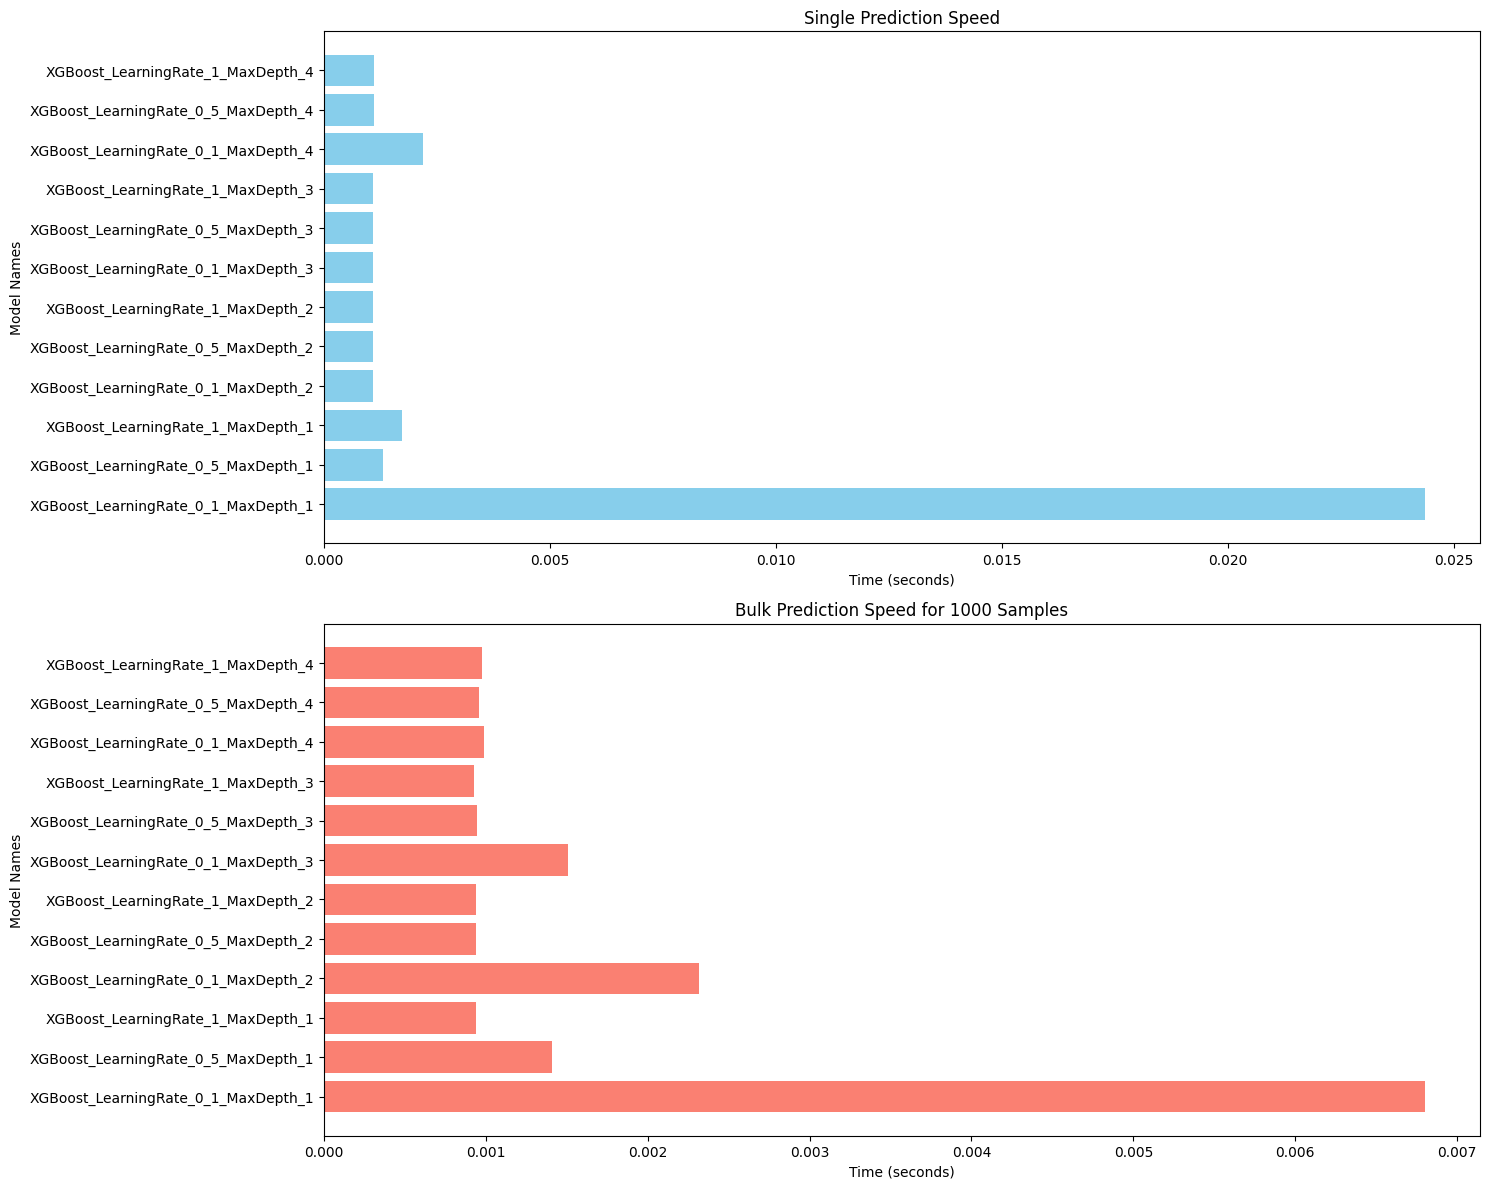

In [17]:
# Plotting
fig, ax = plt.subplots(2, 1, figsize=(15, 12))

# Single Prediction Times
ax[0].barh(model_names, single_pred_times, color='skyblue')
ax[0].set_title('Single Prediction Speed')
ax[0].set_xlabel('Time (seconds)')
ax[0].set_ylabel('Model Names')

# Bulk Prediction Times
ax[1].barh(model_names, bulk_pred_times, color='salmon')
ax[1].set_title('Bulk Prediction Speed for 1000 Samples')
ax[1].set_xlabel('Time (seconds)')
ax[1].set_ylabel('Model Names')

plt.tight_layout()
plt.show()

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

print("Features in the dataset:")
for feature in X_train.columns:
    print(feature)

Features in the dataset:
age
gender
user_type
purchase_history
avg_session_duration
last_login_days
total_spend
product_reviews
adverts_targeted
discount_offered


In [19]:
best_model = load(f'{best_model_name}_model.joblib')

feature_importance = best_model.feature_importances_

In [20]:
selected_features = ['adverts_targeted', 'discount_offered']
indices = [list(X_train.columns).index(feature) for feature in selected_features]
selected_importances = [feature_importance[i] for i in indices]

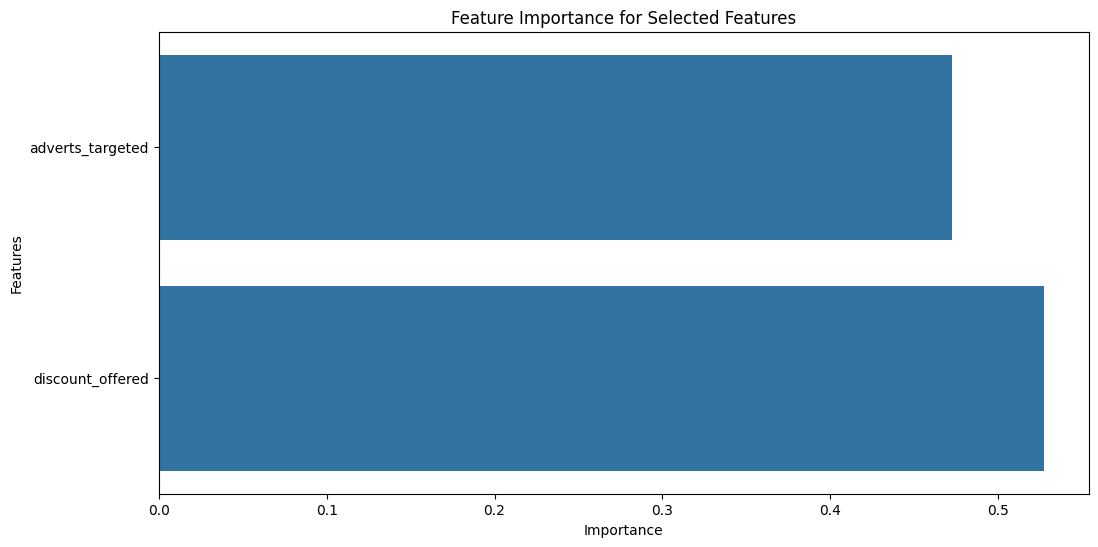

In [21]:
plt.figure(figsize=(12, 6))
sns.barplot(x=selected_importances, y=selected_features)
plt.title('Feature Importance for Selected Features')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

In [22]:
print("Influential features in order:")
for i, feature in enumerate(selected_features, 1):
    print(f"{i}. {feature} - Importance: {selected_importances[i-1]:.4f}")

Influential features in order:
1. adverts_targeted - Importance: 0.4724
2. discount_offered - Importance: 0.5276


In [23]:
# Define possible values
adverts_values = list(range(1, 11))
discount_values = list(range(1, 11))

# Create a grid for predictions
predictions = np.zeros((len(adverts_values), len(discount_values)))

# Make predictions for each combination
for i, adverts in enumerate(adverts_values):
    for j, discount in enumerate(discount_values):
        # Create a sample with all features set to their average (or median) values
        sample = X_train.mean().to_dict()
        sample['adverts_targeted'] = adverts
        sample['discount_offered'] = discount

        # Convert dictionary to DataFrame
        df_sample = pd.DataFrame([sample])

        # Make prediction
        predictions[i, j] = best_model.predict(df_sample)[0]

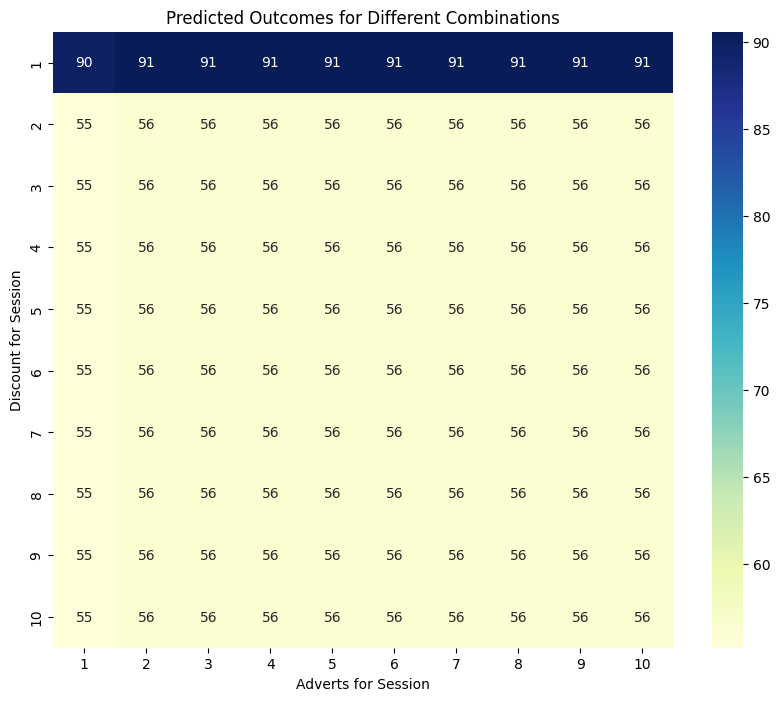

In [24]:
# Visualization for Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(predictions, xticklabels=adverts_values, yticklabels=discount_values, annot=True, cmap='YlGnBu')
plt.title('Predicted Outcomes for Different Combinations')
plt.xlabel('Adverts for Session')
plt.ylabel('Discount for Session')
plt.show()

In [25]:
df_predictions = pd.DataFrame({
    'Adverts': np.repeat(adverts_values, len(discount_values)),
    'Discounts': np.tile(discount_values, len(adverts_values)),
    'Predictions': predictions.ravel()
})

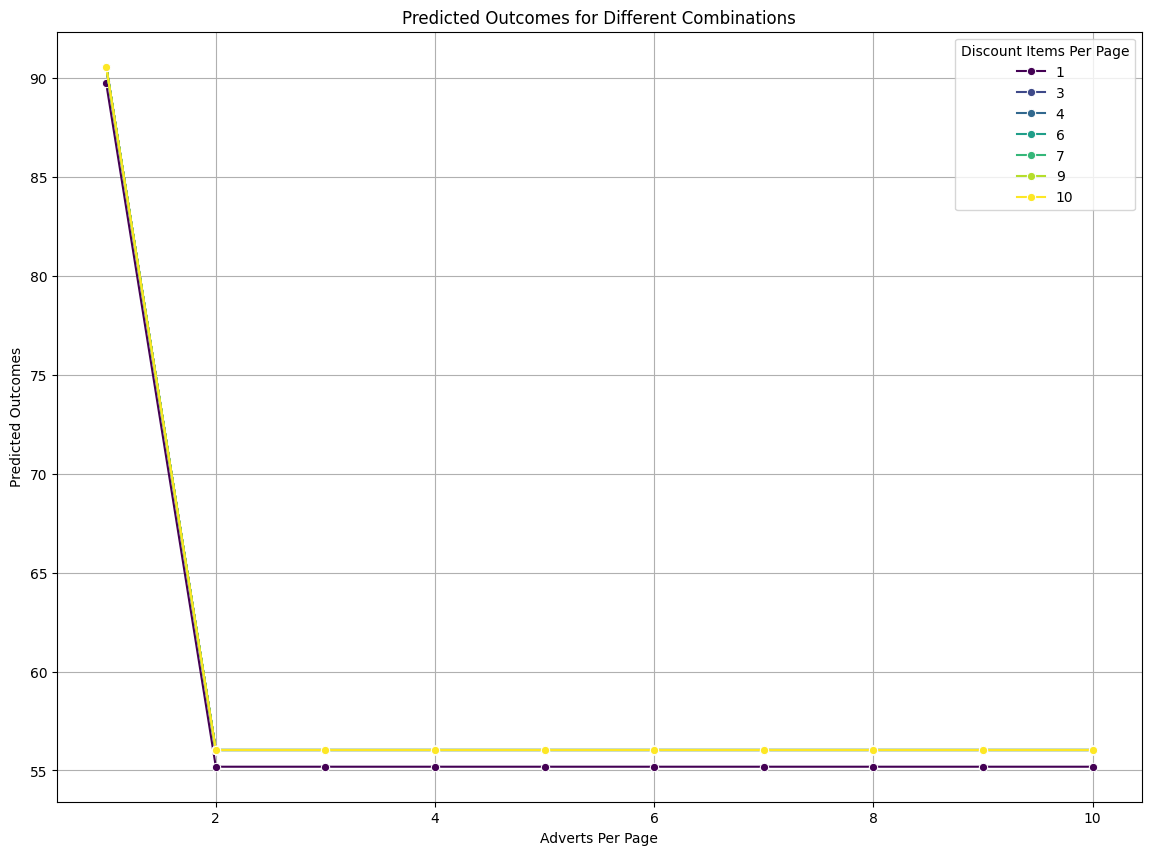

In [26]:
# Visualization for Line Graph
plt.figure(figsize=(14, 10))
sns.lineplot(x='Adverts', y='Predictions', hue='Discounts', data=df_predictions, palette='viridis', marker="o")
plt.title('Predicted Outcomes for Different Combinations')
plt.xlabel('Adverts Per Page')
plt.ylabel('Predicted Outcomes')
plt.legend(title='Discount Items Per Page')
plt.grid(True)
plt.show()

In [27]:
# Find the indices of the maximum predicted value
optimal_idx = np.unravel_index(predictions.argmax(), predictions.shape)
optimal_adverts = adverts_values[optimal_idx[0]]
optimal_discounts = discount_values[optimal_idx[1]]

print(f"The optimal number of adverts per page for maximizing sales is: {optimal_adverts}")
print(f"The optimal number of discounts per page for maximizing sales is: {optimal_discounts}")

The optimal number of adverts per page for maximizing sales is: 1
The optimal number of discounts per page for maximizing sales is: 2


In [28]:
sample = X_train.mean().to_dict()
sample['adverts_targeted'] = optimal_adverts
sample['discount_offered'] = optimal_discounts

In [29]:
# Convert dictionary to DataFrame and predict
df_sample = pd.DataFrame([sample])
predicted_sales_optimal = best_model.predict(df_sample)[0]

print(f"Predicted average sale with {optimal_adverts} adverts and {optimal_discounts} discounts per page: {predicted_sales_optimal}")

Predicted average sale with 1 adverts and 2 discounts per page: 90.5713119506836


In [30]:
df= train_data
# Calculate statistics
count = len(df)
mean_sales = df['sales'].mean()

# Print calculated values
print(f"Count: {count} (Number of instances)")
print(f"Mean (Average) Sales: Approximately ${mean_sales:.2f}")

Count: 800 (Number of instances)
Mean (Average) Sales: Approximately $82.46


## FINAL CONCLUSION
##### Present the potential revenue increase use projections based on historical data and model predictions.
##### Revenue Increase: If the model's recommendations can increase the average sales from \\$82.46 to \\$90.57.
##### Then over 800 instances, the potential revenue increase would be \\$(90.57 - 82.46) * 800 = \\$6,488.
##### This increase signifies the potential of our model's recommendations allowing us to optimize marketing and derive more value from our investments.